## Import necessary modules
Run this cell before running any other cells

In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

In [61]:
from uuid import uuid4
uuid4()

UUID('c9890b99-5a42-4810-a4dd-64319d1f148b')

# Printing and Logging
## Printing
You can use the **print()** function in Python to print messages to the screen. <br>
The message can be a string, or any other object, the object will be converted into a string before it is written to the screen. <br>

## Logging
You could use the logging module that is setup in *utils.py*. <br>
It prints to both your screen (standard output) as well as to log files (*ble.log*) in the *logs* directory. <br>
This is the recommended way to output messages, since the log files can help with debugging. <br>
The logging module also provides different log levels as shown below, each formatted with a different color for increased visibility. <br>

__**NOTE**__: You may notice that the DEBUG message is not printed to the screen but is printed in the log file. This is because the logging level for the screen is set to INFO and for the file is set to DEBUG. You can change the default log levels in *utils.py* (**STREAM_LOG_LEVEL** and **FILE_LOG_LEVEL**). 

## Formatting output
To format your strings, you may use %-formatting, str.format() or f-strings. <br>
The most "pythonic" way would be to use f-strings. [Here](https://realpython.com/python-f-strings/) is a good tutorial on f-strings. <br>

In [10]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

2025-02-13 17:05:57,019 | INFO     |: info
2025-02-13 17:05:57,020 | WARNING  |: warning
2025-02-13 17:05:57,022 | ERROR    |: error
2025-02-13 17:05:57,024 | CRITICAL |: critical


<hr>

# BLE
## ArtemisBLEController
The class **ArtemisBLEController** (defined in *ble.py*) provides member functions to handle various BLE operations to send and receive data to/from the Artemis board, provided the accompanying Arduino sketch is running on the Artemis board. <br>

<table align="left">
     <tr>
        <th style="text-align: left; font-size: medium">Member Functions</th>
        <th style="text-align: left; font-size: medium">Description</th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">reload_config()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Reload changes made in <em>connection.yaml.</em></span></th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">connect()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Connect to the Artemis board, whose MAC address is specified in <em>connection.yaml</em>.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">disconnect()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Disconnect from the Artemis board.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">is_connected()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Return a boolean indicating whether your controller is connected to the Artemis board or not.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">send_command(cmd_type, data)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Send the command <strong>cmd_type</strong> (integer) with <strong>data</strong> (string) to the Artemis board.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">receive_float(uuid) <br> receive_string(uuid) <br> receive_int(uuid)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Read the GATT characteristic (specified by its <strong>uuid</strong>) of type float, string or int. <br> The type of the GATT
            characteristic is determined by the classes BLEFloatCharacteristic, BLECStringCharacteristic or
            BLEIntCharacteristic in the Arduino sketch.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">start_notify(uuid, notification_handler)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Activate notifications on the GATT characteristic (specified by its <strong>uuid</strong>). <br> <strong>notification_handler</strong> is a
            function callback which must accept two inputs; the first will be a uuid string object and the second will
            be the bytearray of the characteristic value.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">bytearray_to_float(byte_array) <br> bytearray_to_string(byte_array) <br> bytearray_to_int(byte_array)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Convert the <strong>bytearray</strong> to float, string or int, respectively. <br> You may use these functions inside your
            notification callback function.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">stop_notify(uuid)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Stop notifications on the GATT characteristic (specified by its <strong>uuid</strong>).</span></th>
    </tr>
</table>

<table align="left">
     <tr>
        <th style="text-align: left; font-size: medium">Member Variables</th>
        <th style="text-align: left; font-size: medium">Description</th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">uuid</span></th>
        <th style="text-align: left"><span style="font-weight: normal">A dictionary that stores the UUIDs of the various characteristics specified in <em>connection.yaml</em>.</span></th>
    </tr>
</table>

## Configuration
- The MAC address, Service UUID and GATT characteristic UUIDs are defined in the file: *connection.yaml*.
- They should match the UUIDs used in the Arduino sketch.
- The artemis board running the base code should display its MAC address in the serial monitor.
- Update the **artemis_address** in *connection.yaml*, accordingly.
- Make sure to call **ble.reload_config()** or **get_ble_controller()** (which internally calls **reload_config()**) after making any changes to your configuration file.

<hr>

In the below cell, we create an **ArtemisBLEController** object using **get_ble_controller()** (defined in *ble.py*), which creates and/or returns a single instance of **ArtemisBLEController**. <br>
<span style="color:rgb(240,50,50)"> __NOTE__: Do not use the class directly to instantiate an object. </span><br>

In [4]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2025-02-17 17:10:58,249 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:83:24:6c:39:3c
2025-02-17 17:11:02,562 | INFO     |: Connected to c0:83:24:6c:39:3c


## Receive data from the Artemis board

The cell below shows examples of reading different types (as defined in the Arduino sketch) of GATT characteristics.

In [4]:
# Read a float GATT Charactersistic
f = ble.receive_float(ble.uuid['RX_FLOAT'])
print(f)

14.5


In [5]:
# Read a string GATT Charactersistic
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

[->9.000<-]


## Send a command to the Artemis board
Send the PING command and read the reply string from the string characteristic RX_STRING. <br>
__NOTE__: The **send_command()** essentially sends a string data to the GATT characteristic (TX_CMD_STRING). The GATT characteristic in the Arduino sketch is of type BLECStringCharacteristic.

In [29]:
ble.send_command(CMD.PING, "")

Current time is: PONG
Current time is: PONG
PONG


In [30]:
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

PONG


The cell below shows an example of the SEND_TWO_INTS command. <br> The two values in the **data** are separated by a delimiter "|". <br>
Refer Lab 2 documentation for more information on the command protocol.

In [31]:
ble.send_command(CMD.SEND_TWO_INTS, "2|-6")

The Artemis board should print the two integers to the serial monitor in the ArduinoIDE. 

In [29]:
ble.send_command(CMD.ECHO, "HiHello")

In [35]:
ble.send_command(CMD.SEND_THREE_FLOATS, "1.0| 2.0| 3.0")

In [40]:
ble.send_command(CMD.GET_TIME_MILLIS, "")
m = ble.receive_string(ble.uuid['RX_STRING'])
print(m)

T: 39830


In [43]:
ble.send_command(CMD.TIME_LOOP, "")
print("Number of timestamps is: ")

Number of timestamps is: 
Current time is: T: 1265669
Current time is: T: 1265669
Current time is: T: 1265669
Current time is: T: 1265670
Current time is: T: 1265716
Current time is: T: 1265763
Current time is: T: 1265763
Current time is: T: 1265803
Current time is: T: 1265803
Current time is: T: 1265803
Current time is: T: 1265847
Current time is: T: 1265847
Current time is: T: 1265894
Current time is: T: 1265894
Current time is: T: 1265894
Current time is: T: 1265934
Current time is: T: 1265940
Current time is: T: 1265977
Current time is: T: 1265987
Current time is: T: 1265987
Current time is: T: 1265987
Current time is: T: 1266025
Current time is: T: 1266025
Current time is: T: 1266065
Current time is: T: 1266071
Current time is: T: 1266071
Current time is: T: 1266109
Current time is: T: 1266119
Current time is: T: 1266119
Current time is: T: 1266159
Current time is: T: 1266159
Current time is: T: 1266159
Current time is: T: 1266199
Current time is: T: 1266199
Current time is: T: 12

In [31]:
def notification_handler(uuid, array):
    string = ble.bytearray_to_string(array)
    print(f'Current time is: {string}')
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)


In [33]:
ble.send_command(CMD.GET_TIME_MILLIS, "")

Current time is: T: 186805
Current time is: T: 186805
T: 186805
Current time is: T: 186805


In [7]:
ble.send_command(CMD.SEND_TIME_DATA, "")

Exception in callback notification_handler()() at C:\Users\Katyas Laptop\AppData\Local\Temp\ipykernel_3000\1333012908.py:7
handle: <Handle notification_handler()() at C:\Users\Katyas Laptop\AppData\Local\Temp\ipykernel_3000\1333012908.py:7>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.752.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 89, in _run
    self._context.run(self._callback, *self._args)
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Katyas Laptop\AppData\Local\Temp\ipykernel_3000\1333012908.py", line 10, in notification_handler
    message.append(received_data)
    ^^^^^^^
NameError: name 'message' is not defined


In [6]:
ble.send_command(CMD.GET_TEMP_READINGS, "")

In [103]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Sending 5 bytes...
Received Data Size: 10, Data Rate: 33.80 bytes/s
Time taken: 0.14793 seconds

Sending 10 bytes...
Received Data Size: 10, Data Rate: 57.82 bytes/s
Time taken: 0.17296 seconds

Sending 15 bytes...
Received Data Size: 10, Data Rate: 85.70 bytes/s
Time taken: 0.17502 seconds

Sending 20 bytes...
Received Data Size: 10, Data Rate: 91.40 bytes/s
Time taken: 0.21882 seconds

Sending 25 bytes...
Received Data Size: 10, Data Rate: 114.35 bytes/s
Time taken: 0.21863 seconds

Sending 30 bytes...
Received Data Size: 10, Data Rate: 137.74 bytes/s
Time taken: 0.21780 seconds

Sending 35 bytes...
Received Data Size: 10, Data Rate: 159.87 bytes/s
Time taken: 0.21893 seconds

Sending 40 bytes...
Received Data Size: 10, Data Rate: 182.39 bytes/s
Time taken: 0.21931 seconds

Sending 45 bytes...
Received Data Size: 10, Data Rate: 171.90 bytes/s
Time taken: 0.26178 seconds

Sending 50 bytes...
Received Data Size: 10, Data Rate: 190.30 bytes/s
Time taken: 0.26274 seconds

Sending 55 byte

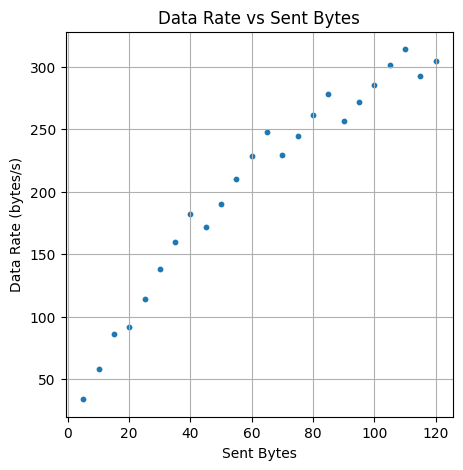

In [49]:
import time
import matplotlib.pyplot as plt

data_rate = []
sent_bytes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]

for size in sent_bytes:
    sent_data = 'a' * size  # Create a message of 'size' bytes
    print(f"Sending {size} bytes...")
    
    start_time = time.time()
    ble.send_command(CMD.CALCULATE_DATA_RATE, sent_data)

    received_data = None
    while not received_data:
        received_data = ble.receive_string(ble.uuid['RX_STRING'])
    
    end_time = time.time()

    rate = size / (end_time - start_time)
    data_rate.append(rate)

    print(f"Received {received_data}, Data Rate: {rate:.2f} bytes/s")
    print(f"Time taken: {end_time - start_time:.5f} seconds\n")

# Plot the data
plt.figure(figsize=(5, 5))
plt.scatter(sent_bytes, data_rate, s=10)
plt.title("Data Rate vs Sent Bytes")
plt.xlabel("Sent Bytes")
plt.ylabel("Data Rate (bytes/s)")
plt.grid()
plt.show()


<!-- Lab 2 -->

In [5]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.0 MB 11.9 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.0 MB 11.8 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.0 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 10.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 10.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ----------------------------------- ---- 2.4/2.6 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 10.6 MB/s eta 0:00:00


In [9]:
#getting data from Arduino:
def handle_IMUdata(uuid, byte_array):
    string = ble.bytearray_to_string(byte_array)
    print(string)
    
ble.start_notify(ble.uuid['RX_STRING'], handle_IMUdata)
ble.send_command(CMD.SEND_IMU_DATA_ACC, '')

Time: 3018571 Pitch: 0.192 Roll: -1.454
Time: 3018577 Pitch: 0.220 Roll: -1.351
Time: 3018579 Pitch: 0.054 Roll: -1.274
Time: 3018581 Pitch: 0.493 Roll: -1.508
Time: 3018586 Pitch: 0.485 Roll: -1.428
Time: 3018588 Pitch: -0.299 Roll: -1.308
Time: 3018590 Pitch: 0.738 Roll: -1.914
Time: 3018592 Pitch: -0.082 Roll: -1.618
Time: 3018594 Pitch: 0.990 Roll: -1.512
Time: 3018596 Pitch: 0.355 Roll: -2.430
Time: 3018597 Pitch: -0.191 Roll: -1.534
Time: 3018600 Pitch: 0.539 Roll: -0.997
Time: 3018602 Pitch: 0.434 Roll: -1.656
Time: 3018604 Pitch: 0.189 Roll: -1.434
Time: 3018611 Pitch: 0.108 Roll: -1.222
Time: 3018613 Pitch: 0.601 Roll: -1.477
Time: 3018618 Pitch: 1.024 Roll: -1.300
Time: 3018620 Pitch: 0.659 Roll: -2.280
Time: 3018622 Pitch: -0.027 Roll: -1.215
Time: 3018623 Pitch: 0.357 Roll: -1.264
Time: 3018628 Pitch: 0.433 Roll: -1.542
Time: 3018630 Pitch: 0.299 Roll: -1.416
Time: 3018632 Pitch: 0.543 Roll: -1.955
Time: 3018635 Pitch: 0.409 Roll: -1.446
Time: 3018637 Pitch: 0.135 Roll: -0.

In [5]:
import matplotlib.pyplot as plt
import time

time = []
pitch_data = []
roll_data = []
pitch_data_filtered = []
roll_data_filtered = []
def get_data(uuid, byte_array):
    global time, pitch_data, roll_data
    s = ble.bytearray_to_string(byte_array).strip()
    #print(f"Received data: {s}")

    clean_data = s.replace("Time:", "").replace("Pitch:", "").replace("Roll:", "").replace("Pitch filtered:", "").replace("Roll filtered:", "").strip()
    parts = clean_data.split()
    #print(parts)

    if len(time) == 0:
        print("no data")

    if len(parts) == 5:

        time.append(float(parts[0]))
        pitch_data.append(float(parts[1]))
        roll_data.append(float(parts[2]))
        pitch_data_filtered.append(float(parts[3]))
        roll_data_filtered.append(float(parts[4]))

        # print(f"Extracted -> Time: {t}, Pitch: {p}, Roll: {r}")

ble.start_notify(ble.uuid['RX_STRING'], get_data)
ble.send_command(CMD.SEND_IMU_DATA_ACC, '')


no data


In [14]:
# def print_and_plot_data():
#     print("\n Final Collected Data:")
#     for i in range(len(time)):
#         print(f"Time: {time[i]} ms | Pitch: {pitch_data[i]}° | Roll: {roll_data[i]}°")
#     if len(time) == 0:
#         print("No data to plot.")
#         return

#     plt.figure(figsize=(10, 5))
#     plt.plot(time, pitch_data, label="Pitch", color="blue", linestyle="-", marker="o")
#     plt.plot(time, roll_data, label="Roll", color="red", linestyle="-", marker="x")
#     plt.xlabel("Time (ms)")
#     plt.ylabel("Angle (degrees)")
#     plt.title("Pitch and Roll Over Time")
#     plt.grid(True)
#     plt.legend()
#     plt.show(block=True)  # Keeps the plot window open


In [26]:
len(time)

0

In [27]:
len(pitch_data)

0

<module 'matplotlib.pyplot' from 'C:\\Users\\Katyas Laptop\\Documents\\ECE5160\\FastRobots_ble\\Lib\\site-packages\\matplotlib\\pyplot.py'>

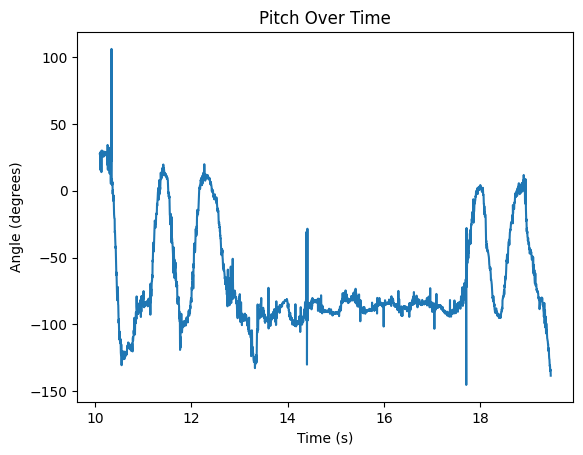

In [10]:
time_floatarray = [float(element) for element in time]
time_sec = np.divide(time_floatarray, 3000)
roll_floatarray = [float(element) for element in roll_data]
pitch_floatarray = [float(element) for element in pitch_data]

plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.title("Pitch Over Time")
plt.plot(time_sec, pitch_floatarray)
plt
#plt.xlabel("Time (s)")
#plt.ylabel("Angle (degrees)")
#plt.title("Roll Over Time")
#plt.plot(time_sec, roll_floatarray)

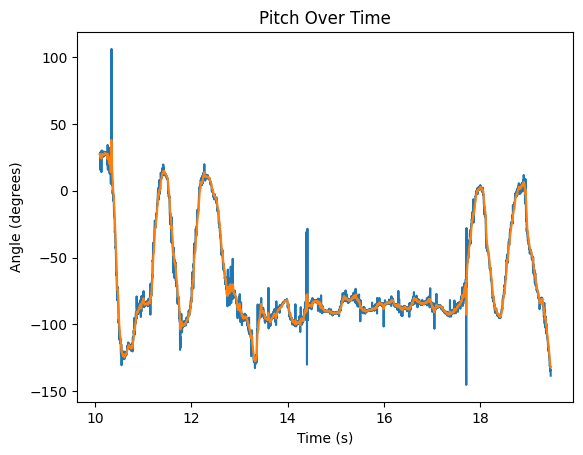

2025-02-17 17:53:45,167 | INFO     |: Disconnected from C0:83:24:6C:39:3C


In [11]:
##FILTERED DATA ACCELEROMETER
time_floatarray = [float(element) for element in time]
time_sec = np.divide(time_floatarray, 3000)
roll_floatarray_filtered = [float(element) for element in roll_data_filtered]
pitch_floatarray_filtered = [float(element) for element in pitch_data_filtered]

pitch_floatarray = pitch_floatarray[:len(time_sec)]
pitch_floatarray_filtered = pitch_floatarray_filtered[:len(time_sec)]

plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.title("Pitch Over Time")
plt.plot(time_sec, pitch_floatarray)
plt.plot(time_sec, pitch_floatarray_filtered)


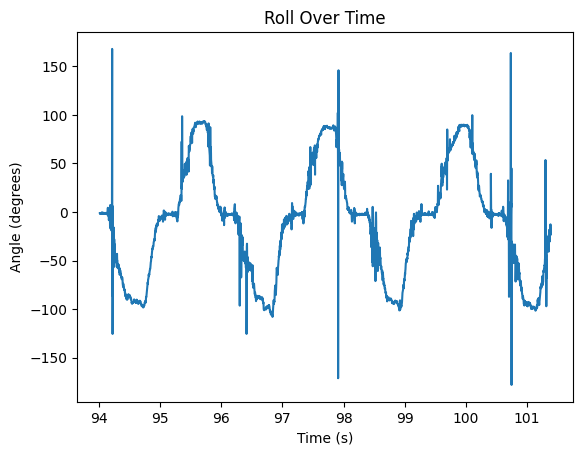

In [56]:
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.title("Roll Over Time")
plt.plot(time_sec, roll_floatarray)
#plt.xlabel("Time (s)")
#plt.ylabel("Angle (degrees)")
#plt.title("Roll Over Time")
#plt.plot(time_sec, roll_floatarray)

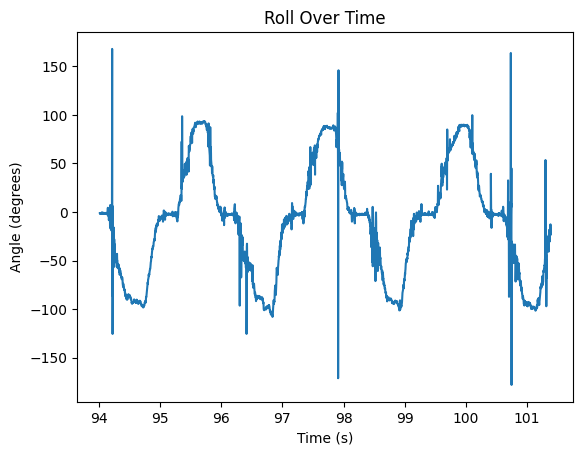

In [57]:
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.title("Roll Over Time")
plt.plot(time_sec, roll_floatarray)
#plt.xlabel("Time (s)")
#plt.ylabel("Angle (degrees)")
#plt.title("Roll Over Time")
#plt.plot(time_sec, roll_floatarray)

In [45]:
print(pitch_data[100:150])

[]


In [9]:
time.clear()
pitch_data.clear()
roll_data.clear()

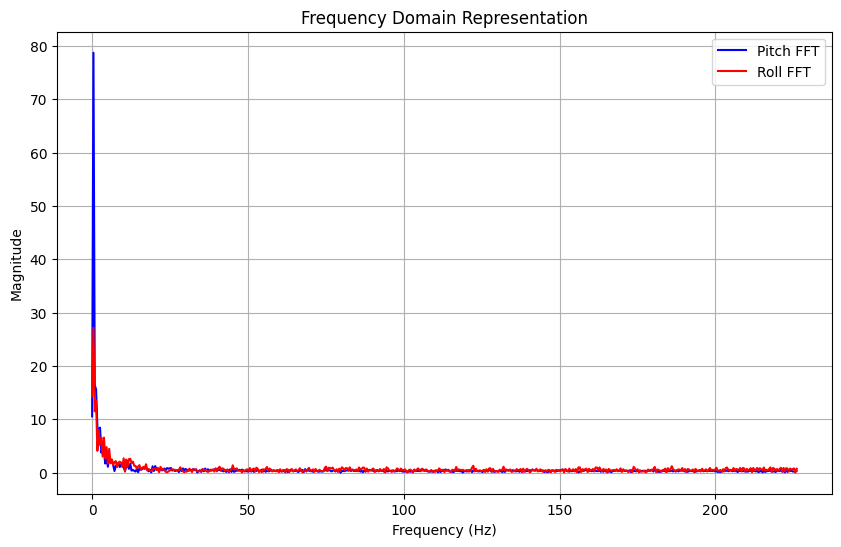

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Sample rate and time vector
N = len(time_floatarray)  # Number of samples
T = ((time_floatarray[N-1] - time_floatarray[0])/ N / 3000)
t = np.arange(0, N) * T  # Time vector

# Perform Fourier transform
pitch_fft = np.fft.fft(pitch_floatarray)
roll_fft = np.fft.fft(roll_floatarray)

# Frequency axis
xf = np.fft.fftfreq(N, T)[:N//2]  # Positive frequencies
pitch_fft_mag = 2.0/N * np.abs(pitch_fft[:N//2])  # Magnitude of positive frequencies
roll_fft_mag = 2.0/N * np.abs(roll_fft[:N//2])  # Magnitude of positive frequencies

# Plot frequency domain data
plt.figure(figsize=(10, 6))

plt.plot(xf, pitch_fft_mag, label='Pitch FFT', color='blue')
plt.plot(xf, roll_fft_mag, label='Roll FFT', color='red')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain Representation')
plt.grid(True)
plt.legend()

plt.show()

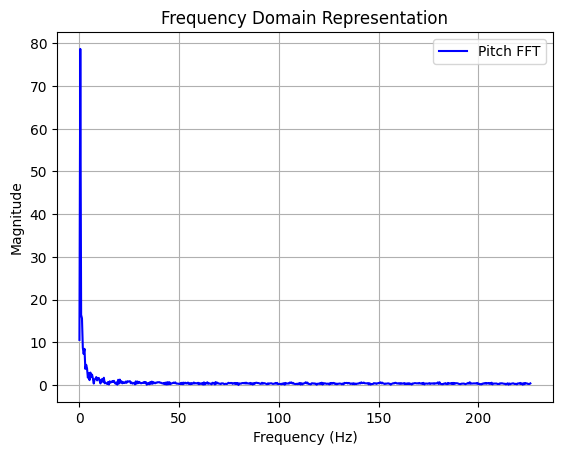

In [40]:
plt.plot(xf, pitch_fft_mag, label='Pitch FFT', color='blue')
#plt.plot(xf, roll_fft_mag, label='Roll FFT', color='red')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain Representation')
plt.grid(True)
plt.legend()

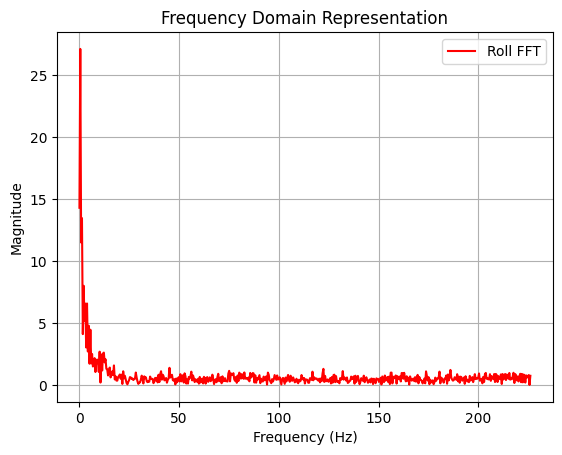

In [39]:
plt.plot(xf, roll_fft_mag, label='Roll FFT', color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain Representation')
plt.grid(True)
plt.legend()

In [42]:
##ROll data

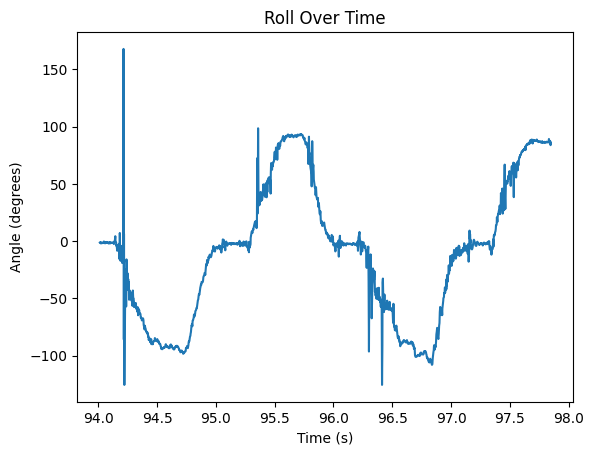

In [46]:
time_floatarray = [float(element) for element in time]
time_sec = np.divide(time_floatarray, 3000)
roll_floatarray = [float(element) for element in roll_data]
pitch_floatarray = [float(element) for element in pitch_data]
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.title("Roll Over Time")
plt.plot(time_sec, roll_floatarray)
#plt.xlabel("Time (s)")
#plt.ylabel("Angle (degrees)")
#plt.title("Roll Over Time")
#plt.plot(time_sec, roll_floatarray)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample rate and time vector
N = len(time_floatarray)  # Number of samples
T = ((time_floatarray[N-1] - time_floatarray[0])/ N / 3000)
t = np.arange(0, N) * T  # Time vector

# Perform Fourier transform
pitch_fft = np.fft.fft(pitch_floatarray)
roll_fft = np.fft.fft(roll_floatarray)

# Frequency axis
xf = np.fft.fftfreq(N, T)[:N//2]  # Positive frequencies
pitch_fft_mag = 2.0/N * np.abs(pitch_fft[:N//2])  # Magnitude of positive frequencies
roll_fft_mag = 2.0/N * np.abs(roll_fft[:N//2])  # Magnitude of positive frequencies

# Plot frequency domain data
plt.figure(figsize=(10, 6))

plt.plot(xf, pitch_fft_mag, label='Pitch FFT', color='blue')
plt.plot(xf, roll_fft_mag, label='Roll FFT', color='red')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain Representation')
plt.grid(True)
plt.legend()

plt.show()

In [47]:
###Low pass filter on accelerometer data

2025-02-17 14:07:35,134 | INFO     |: Disconnected from C0:83:24:6C:39:3C


In [ ]:
alpha = T/(T+R*C)
          


In [14]:
##GYROSCOPE

In [3]:
import matplotlib.pyplot as plt
import time

time_gyro = []
pitch_data_gyro = []
roll_data_gyro = []
yaw_data_gyro = []
def get_data2(uuid, byte_array):
    global time_gyro, pitch_data_gyro, roll_data_gyro, yaw_data_gyro
    m = ble.bytearray_to_string(byte_array).strip()
    #print(f"Received data: {m}")

    clean_data = m.replace("Time:", "").replace("Pitch:", "").replace("Roll:", "").replace("Yaw:", "").strip()
    parts = clean_data.split()
    #print(parts)

    if len(time_gyro) == 0:
        print("no data")

    if len(parts) == 4:

        time_gyro.append(float(parts[0]))
        pitch_data_gyro.append(float(parts[1]))
        roll_data_gyro.append(float(parts[2]))
        yaw_data_gyro.append(float(parts[3]))

        # print(f"Extracted -> Time: {t}, Pitch: {p}, Roll: {r}, Yaw: {y}")

ble.start_notify(ble.uuid['RX_STRING'], get_data2)
ble.send_command(CMD.SEND_IMU_DATA_GYRO, '')


no data


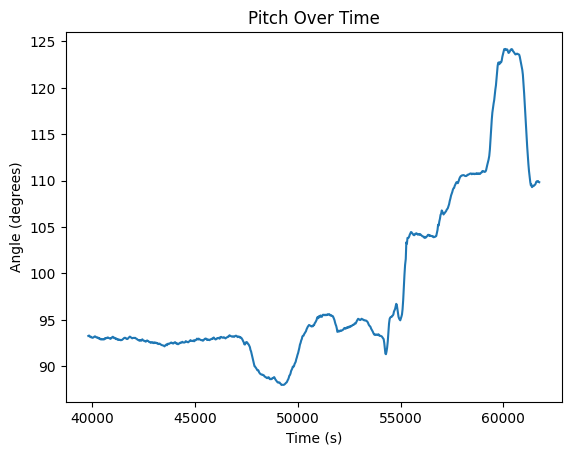

In [4]:
time_fl = [float(element) for element in time_gyro]
timeg = np.divide(time_fl, 1000)
roll_gyro = [float(element) for element in roll_data_gyro]
pitch_gyro= [float(element) for element in pitch_data_gyro]


plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.title("Pitch Over Time")
plt.plot(timeg, pitch_gyro)
#plt.xlabel("Time (s)")
#plt.ylabel("Angle (degrees)")
#plt.title("Roll Over Time")
#plt.plot(time_sec, roll_floatarray)

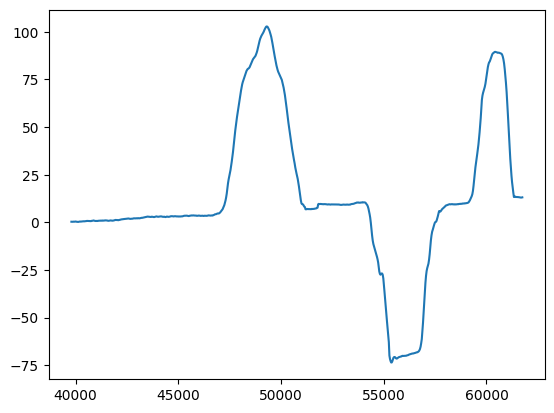

In [5]:
plt.plot(timeg, roll_gyro)

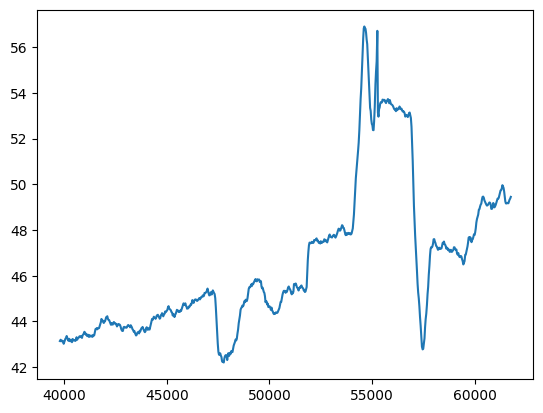

In [9]:
yaw_gyro = [float(element) for element in yaw_data_gyro]
yaw_gyro = yaw_gyro[:len(timeg)]
plt.plot(timeg, yaw_gyro)

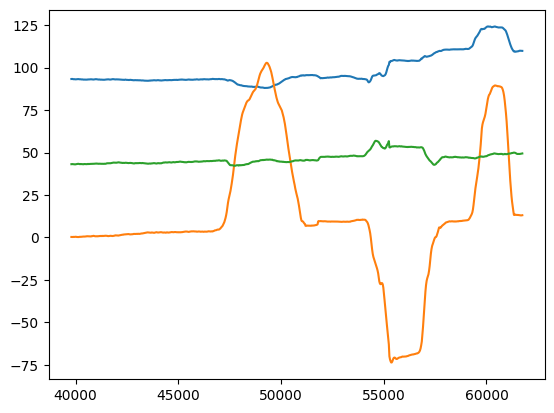

In [10]:
plt.plot(timeg, pitch_gyro)
plt.plot(timeg, roll_gyro)
plt.plot(timeg, yaw_gyro)

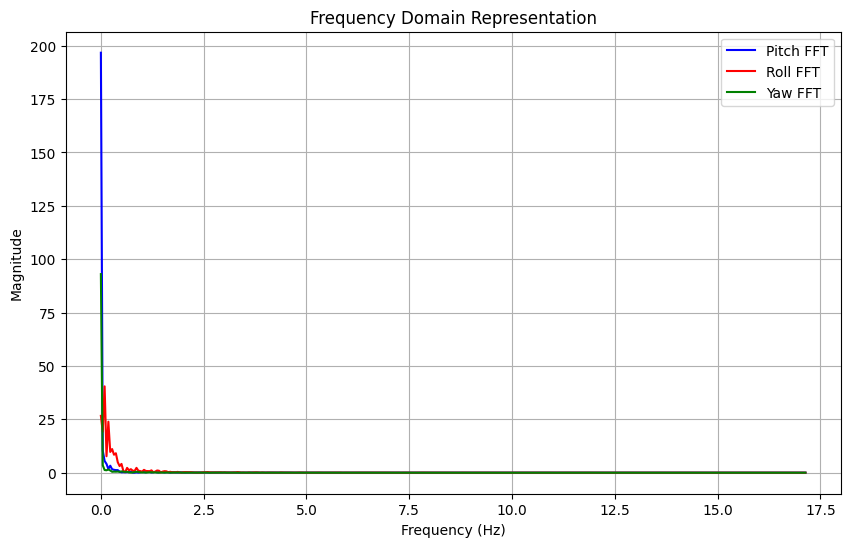

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Sample rate and time vector
N = len(timeg)  # Number of samples
T = ((timeg[N-1] - timeg[0])/ N / 1000)
t = np.arange(0, N) * T  # Time vector

# Perform Fourier transform
pitch_fft = np.fft.fft(pitch_gyro)
roll_fft = np.fft.fft(roll_gyro)
yaw_fft = np.fft.fft(yaw_gyro)

# Frequency axis
xf = np.fft.fftfreq(N, T)[:N//2]  # Positive frequencies
pitch_fft_mag = 2.0/N * np.abs(pitch_fft[:N//2])  # Magnitude of positive frequencies
roll_fft_mag = 2.0/N * np.abs(roll_fft[:N//2])  # Magnitude of positive frequencies
yaw_fft_mag = 2.0/N * np.abs(yaw_fft[:N//2])  # Magnitude of positive frequencies

# Plot frequency domain data
plt.figure(figsize=(10, 6))

plt.plot(xf, pitch_fft_mag, label='Pitch FFT', color='blue')
plt.plot(xf, roll_fft_mag, label='Roll FFT', color='red')
plt.plot(xf, yaw_fft_mag, label='Yaw FFT', color='green')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain Representation')
plt.grid(True)
plt.legend()

plt.show()

In [4]:
#get the data sent from the Arduino

def parse_attitude( data: str ) -> tuple[int, float, float]:
  data_components = data.split("/")
  t = data_components[0]
  p = data_components[1]
  r = data_components[2]
  return int(t), float(p), float(r)

ble.send_command(CMD.SEND_IMU_DATA_ACC, "")
data = ble.receive_string(ble.uuid['RX_STRING'])
t, p, r = parse_attitude(data)
LOG.info(f"Received data: TIME = {t}, PITCH = {p:.5f}, ROLL = {r:.5f}")


no data


IndexError: list index out of range

2025-02-16 01:44:32,862 | INFO     |: Disconnected from C0:83:24:6C:39:3C


In [ ]:
#get the data sent from the Arduino

def parse_attitude( data: str ) -> tuple[int, float, float]:
    for i in data: 
        data_components = data.split("/")
        t = data_components[0]
        p = data_components[1]
        r = data_components[2]
    return int(t), float(p), float(r)

ble.send_command(CMD.SEND_IMU_DATA_ACC, "")
data = ble.receive_string(ble.uuid['RX_STRING'])
t, p, r = parse_attitude(data)
LOG.info(f"Received data: TIME = {t}, PITCH = {p:.5f}, ROLL = {r:.5f}")

import matplotlib.pyplot as plt
time_data = []
pitch_data = []
roll_data = []

for i in range(10):
    ble.send_command(CMD.SEND_IMU_DATA_ACC, '')
    data = ble.receive_string(ble.uuid['RX_STRING'])
    t, p, r = parse_attitude(data)
    time_data.append(t)
    pitch_data.append(p)
    roll_data.append(r)

    print(f"(i*100/200:.2f)% done", end = '\r')

plt.plot(time_data, pitch_data, label = 'Pitch')
plt.plot(time_data, roll_data, label = 'Roll')
plt.legend()
plt.show()
plt.clf()

In [ ]:
import matplotlib.pyplot as plt
import time

def parse_attitude(data: str):
    """Parse received data string into a list of (time, pitch, roll) tuples."""
    try:
        lines = data.strip().split("\n")  # Split multiple lines
        parsed_data = []
        for line in lines:
            components = line.split("/")
            if len(components) == 3:
                t, p, r = int(components[0]), float(components[1]), float(components[2])
                parsed_data.append((t, p, r))
    except ValueError:
        return []  # Return empty list if parsing fails

# Data storage
time_data, pitch_data, roll_data = [], [], []

# Send command to request batch data
ble.send_command(CMD.SEND_DATA, "")

start_time = time.time()
MAX_POINTS = 200  # Adjust as needed

while len(time_data) < MAX_POINTS:
    data = ble.receive_string(ble.uuid['RX_STRING'])  # Get multiple points at once
    batch_data = parse_attitude(data)
    
    if batch_data:
        for t, p, r in batch_data:
            time_data.append(t)
            pitch_data.append(p)
            roll_data.append(r)
    
    print(f"Collected {len(time_data)}/{MAX_POINTS} data points", end='\r')

# Stop data collection
#ble.send_command(CMD.STOP_DATA, "")

# Plot results
plt.plot(time_data, pitch_data, label='Pitch')
plt.plot(time_data, roll_data, label='Roll')
plt.legend()
plt.show()


Collected 0/200 data points

## Disconnect

# Disconnect
ble.disconnect()